## Usable Code

Import the pickle object created in the Web Scraping notebook:

In [101]:
import pickle

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, lars_path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
with open('game_df.pickle','rb') as read_file:
    game_df = pickle.load(read_file)
    
game_df

,home,away,total,tot_1st,tot_rush_att,tot_rush_yds,tot_rush_tds,tot_comp,tot_att,tot_pass_yds,...,tot_third_per,tot_fourth_conv,tot_fourths,tot_fourth_per,margin,tot_off_epa,tot_pass_epa,tot_rush_epa,tot_to_epa,tot_spec_epa
0,Green Bay Packers,New Orleans Saints,76,54,48,184,2,59,84,731,...,65.38,0,1,0.0,8,43.00,38.99,4.54,-3.32,1.53
1,St. Louis Rams,Philadelphia Eagles,44,48,58,390,2,32,67,396,...,40.00,2,4,50.0,18,8.39,3.99,7.93,-15.10,0.21
2,Baltimore Ravens,Pittsburgh Steelers,42,37,47,236,1,39,70,504,...,40.00,0,2,0.0,27,-12.06,-10.10,-0.69,-29.55,3.57
3,Jacksonville Jaguars,Tennessee Titans,30,33,60,206,1,38,58,438,...,44.83,0,0,NaN,2,3.30,8.45,-5.50,-5.12,2.37
4,Houston Texans,Indianapolis Colts,41,41,57,231,2,33,55,417,...,30.00,0,1,0.0,27,-11.81,-1.75,-8.81,-24.37,8.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,Pittsburgh Steelers,Cleveland Browns,85,54,47,179,3,68,102,764,...,48.28,3,3,100.0,14,18.27,26.56,-3.61,-25.47,4.08
2665,Green Bay Packers,Los Angeles Rams,50,45,55,284,3,44,63,470,...,50.00,0,1,0.0,13,26.68,18.65,11.64,0.00,5.23
2666,Buffalo Bills,Baltimore Ravens,20,36,48,182,0,43,74,428,...,36.67,0,2,0.0,14,-18.04,-18.22,-0.04,-10.36,1.22
2667,Kansas City Chiefs,Cleveland Browns,39,45,46,235,2,50,75,525,...,47.83,5,5,100.0,5,24.19,9.53,14.87,-11.14,8.48


## Scratch Work Area

### EDA

In [6]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   home              2669 non-null   object 
 1   away              2669 non-null   object 
 2   total             2669 non-null   int64  
 3   tot_1st           2669 non-null   int64  
 4   tot_rush_att      2669 non-null   int64  
 5   tot_rush_yds      2669 non-null   int64  
 6   tot_rush_tds      2669 non-null   int64  
 7   tot_comp          2669 non-null   int64  
 8   tot_att           2669 non-null   int64  
 9   tot_pass_yds      2669 non-null   int64  
 10  total_pass_tds    2669 non-null   int64  
 11  total_int         2669 non-null   int64  
 12  tot_sacks         2669 non-null   int64  
 13  tot_sack_yds      2669 non-null   int64  
 14  tot_net_pass_yds  2669 non-null   int64  
 15  total_tot_yds     2669 non-null   int64  
 16  tot_fum           2669 non-null   int64  


Total fourth down conversion percentage (tot_fourth_per) has 300+ null values. These are games where neither team attempted a fourth down conversion without their special teams unit. These are ok to leave as NaN.

In [10]:
game_df.describe()

,total,tot_1st,tot_rush_att,tot_rush_yds,tot_rush_tds,tot_comp,tot_att,tot_pass_yds,total_pass_tds,total_int,...,tot_third_per,tot_fourth_conv,tot_fourths,tot_fourth_per,margin,tot_off_epa,tot_pass_epa,tot_rush_epa,tot_to_epa,tot_spec_epa
count,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,...,2669.000000,2669.000000,2669.000000,2303.000000,2669.000000,2669.000000,2669.000000,2669.00000,2669.000000,2669.000000
mean,45.892844,40.318097,53.312851,226.324841,1.650431,43.794305,69.941176,502.903335,3.127389,1.726115,...,39.297924,0.983514,1.983514,48.653865,11.461596,5.075594,8.016111,-1.99828,-11.261199,4.132870
std,13.985768,6.832241,7.162699,63.706050,1.269651,8.194507,10.909739,117.035197,1.776564,1.295070,...,10.181318,1.031962,1.407209,37.842489,9.156709,18.631078,16.151895,8.06680,7.625654,3.369723
min,6.000000,21.000000,31.000000,46.000000,0.000000,10.000000,25.000000,91.000000,0.000000,0.000000,...,10.340000,0.000000,0.000000,0.000000,0.000000,-69.640000,-48.290000,-27.93000,-44.330000,0.010000
25%,36.000000,36.000000,48.000000,181.000000,1.000000,38.000000,63.000000,423.000000,2.000000,1.000000,...,32.140000,0.000000,1.000000,0.000000,4.000000,-7.640000,-3.130000,-7.60000,-15.820000,1.520000
50%,45.000000,40.000000,53.000000,220.000000,1.000000,44.000000,70.000000,494.000000,3.000000,2.000000,...,39.130000,1.000000,2.000000,50.000000,8.000000,4.580000,7.840000,-2.11000,-10.200000,3.350000
75%,55.000000,45.000000,58.000000,265.000000,2.000000,49.000000,77.000000,575.000000,4.000000,2.000000,...,45.830000,2.000000,3.000000,100.000000,17.000000,18.120000,19.040000,3.39000,-5.440000,5.920000
max,105.000000,68.000000,97.000000,551.000000,9.000000,73.000000,110.000000,1000.000000,13.000000,8.000000,...,78.260000,6.000000,8.000000,100.000000,58.000000,57.420000,58.730000,25.61000,3.280000,25.940000


Total (our target) has a mean of ~46 points/game +/- 14 points. This is great to have a sense of as we move forward, but realize that this mean has a std of almost 33% of its value. From this we can get 2 huge things immediately for realistic expectations about our model. First, that our R^2 value will probably never get to 0.8+, and rather be around 0.5-0.6 at best. Second, we should investigate to see how many of our games have totals that we can consider statistical outliers, maybe then we can get a smaller std dev, if only by a point or 2. Let's check out how that distribution looks like.

(array([  0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   2.,   1.,   0.,
          3.,   6.,   0.,   4.,   6.,   5.,   2.,  17.,  18.,  12.,  19.,
         33.,  11.,  11.,  47.,  45.,  22.,  33.,  63.,  27.,  36.,  83.,
         71.,  34.,  66.,  82.,  48.,  67.,  96.,  91.,  46.,  99., 105.,
         64.,  61.,  84.,  71.,  60.,  78., 105.,  63.,  36.,  58.,  75.,
         30.,  55.,  51.,  34.,  20.,  41.,  36.,  28.,  29.,  45.,  26.,
         19.,  15.,  30.,   9.,  23.,  11.,  19.,   8.,   5.,   9.,   4.,
          6.,   9.,   7.,   2.,   4.,   3.,   1.,   5.,   3.,   4.,   1.,
          3.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   1.]),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
  

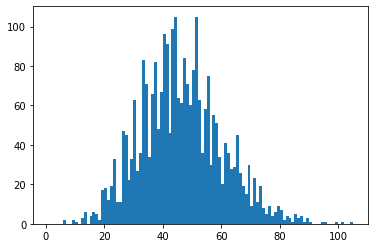

In [16]:
plt.hist(game_df['total'],bins=range(1,106))

We can see that most scores are centered around our mean (46), with the most common scores being 44 & 51. These are both "football" numbers, which are multiples of 3 and 7 essentially, but also includes +/- 1 and the permutations therein. For example, 6 is also considered a football number (7-1), and so is 10 (7+3). Off of this you have secondary football numbers where you repeat the process. All this is to say that we SHOULD expect to see huge dips of occurrence next to some of the most frequent events because it is mathematically difficult to get to that number by only scoring permutations of 1 (PAT), 2 (safety), 3 (FG), and 6 (TD) points.

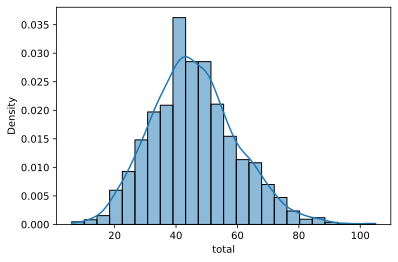

In [114]:
sns.histplot(game_df['total'],bins=24, stat = 'density', kde = True );
plt.savefig("hist_25.png")

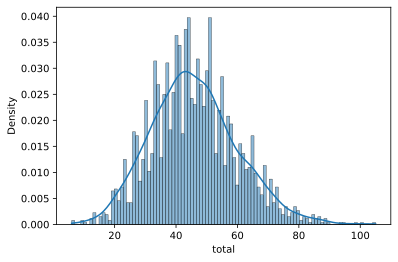

In [108]:
total_hist_100 = sns.histplot(game_df['total'],bins=100, stat = 'density', kde = True );
plt.savefig("hist_100.png")

In [17]:
game_df.corr()

,total,tot_1st,tot_rush_att,tot_rush_yds,tot_rush_tds,tot_comp,tot_att,tot_pass_yds,total_pass_tds,total_int,...,tot_third_per,tot_fourth_conv,tot_fourths,tot_fourth_per,margin,tot_off_epa,tot_pass_epa,tot_rush_epa,tot_to_epa,tot_spec_epa
total,1.000000,0.665957,-0.016712,0.180354,0.455803,0.409151,0.311414,0.591076,0.723048,0.015120,...,0.371959,0.133828,0.002424,0.178557,0.063315,0.618441,0.563981,0.299044,-0.116506,0.033424
tot_1st,0.665957,1.000000,-0.025900,0.217821,0.361428,0.597362,0.462700,0.661983,0.542980,-0.092619,...,0.494157,0.142629,0.006159,0.177206,-0.105833,0.778989,0.690955,0.414008,0.074940,-0.061122
tot_rush_att,-0.016712,-0.025900,1.000000,0.651266,0.231581,-0.611007,-0.524255,-0.438493,-0.186519,0.007382,...,-0.008446,-0.009241,0.010292,-0.016186,0.046104,-0.086989,-0.190293,0.169029,-0.061379,0.032692
tot_rush_yds,0.180354,0.217821,0.651266,1.000000,0.356182,-0.372895,-0.362936,-0.272453,-0.025316,-0.040099,...,0.097772,0.017430,-0.006626,0.032957,0.088896,0.226899,-0.073555,0.671641,0.017261,0.026450
tot_rush_tds,0.455803,0.361428,0.231581,0.356182,1.000000,-0.004212,-0.058364,0.088606,-0.097731,-0.008784,...,0.204116,0.096295,0.036632,0.086735,0.125885,0.345430,0.167267,0.468060,0.001885,-0.010947
tot_comp,0.409151,0.597362,-0.611007,-0.372895,-0.004212,1.000000,0.819749,0.787837,0.476300,-0.066305,...,0.293452,0.133764,0.060520,0.114467,-0.165758,0.456417,0.540794,-0.023451,0.037313,-0.052755
tot_att,0.311414,0.462700,-0.524255,-0.362936,-0.058364,0.819749,1.000000,0.677003,0.356057,0.097119,...,0.077177,0.121828,0.091441,0.073806,-0.174019,0.180887,0.256173,-0.087371,-0.080579,0.000451
tot_pass_yds,0.591076,0.661983,-0.438493,-0.272453,0.088606,0.787837,0.677003,1.000000,0.604594,-0.056032,...,0.314586,0.075268,-0.004555,0.092066,-0.149567,0.607819,0.713579,-0.015762,0.033422,-0.037435
total_pass_tds,0.723048,0.542980,-0.186519,-0.025316,-0.097731,0.476300,0.356057,0.604594,1.000000,-0.054228,...,0.352042,0.129740,0.035473,0.139380,0.016222,0.580340,0.633877,0.074186,0.033050,-0.021022
total_int,0.015120,-0.092619,0.007382,-0.040099,-0.008784,-0.066305,0.097119,-0.056032,-0.054228,1.000000,...,-0.118933,-0.047971,-0.058214,-0.001898,0.116295,-0.355229,-0.371887,-0.076685,-0.689214,0.000277


As the correlation table shows, there are 7 metrics from our scraped data that correlate "well" with our intended target (total). These are: 1st downs, passing yards, passing touchdowns, net passing yards, total yards, total offensive expected points added (EPA), and total passing EPA. These all make sense knowing that passing contributes the most to moving the ball closer to the end zone and leading to points being scored. A couple of these however, may be colinear. We will do a pairplot below to confirm our suspicions.

In [34]:
corr_df = game_df[['total','tot_1st','tot_pass_yds','total_pass_tds','tot_net_pass_yds',
         'total_tot_yds','tot_off_epa','tot_pass_epa']]

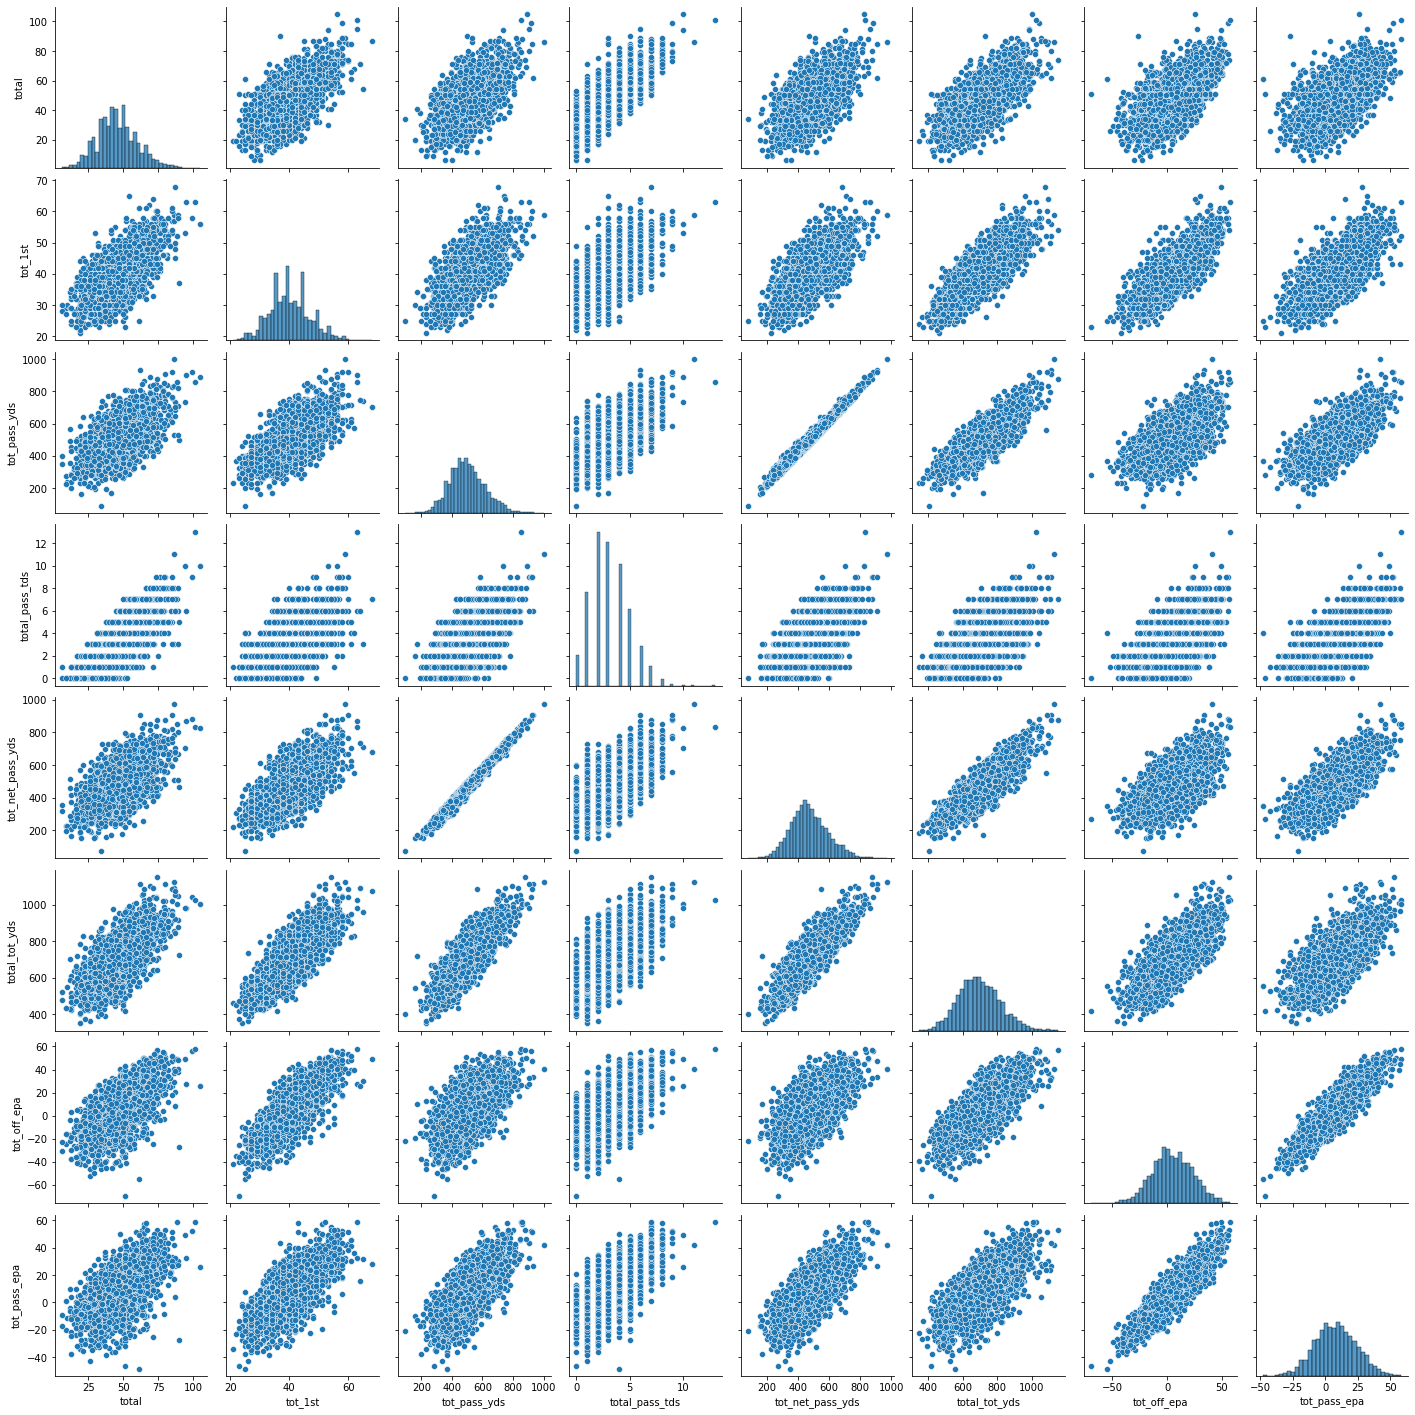

In [35]:
sns.pairplot(corr_df);

## Regression

### MVP (Linear, hand selected features)

In [79]:
target_df = game_df['total']
features_df = game_df[['tot_1st','tot_pass_yds','total_pass_tds','tot_net_pass_yds',
         'total_tot_yds','tot_off_epa','tot_pass_epa']]

In [80]:
X, y = features_df, target_df

In [81]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [82]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_lm_r2s = [] #collect the validation results

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(round(lm.score(X_val, y_val), 3))

print('Simple regression scores: ', cv_lm_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

Simple regression scores:  [0.667, 0.633, 0.702, 0.613, 0.66] 

Simple mean cv r^2: 0.655 +- 0.030


In [83]:
game_lr = LinearRegression()

game_lr.fit(X_test,y_test)

game_lr.score(X_test,y_test) #R^2

0.6760060130357344

In [84]:
game_lr.coef_, game_lr.intercept_

(array([ 0.23647932,  0.00554111,  3.79630282, -0.01061486,  0.04110827,
         0.11198312, -0.11228503]),
 -1.9382437190696464)

In [109]:
test_set_pred_lr = game_lr.predict(X_test)
mae(y_test, test_set_pred_lr)

6.284250200882783

As we mentioned earlier, this score is probably about as high as we could ever get, but I am a little more suspicious due to the multi-colinearity found across multiple metrics of ours. Let's do some feature engineering!

## LASSO Regression with CV

Split data into test & cross-validation splits

In [59]:
#drop strings, targets, and NaN columns (tot_fourth_per shown to have very little correlation in EDA)
X = game_df.drop(['total','home','away','tot_fourth_per'], axis=1)
y = game_df['total']

In [60]:
#split testing dataset
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Let's scale our data since our efficiency metrics and traditional stats are a whole order of magnitude different

In [61]:
stdscale = StandardScaler()
stdscale.fit(X_.values)

StandardScaler()

In [62]:
## Scale the Predictors on both the train and test set
X_tr = stdscale.transform(X_.values)
X_te = stdscale.transform(X_test.values)

In [69]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-3,3,300)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_)

LassoCV(alphas=array([1.00000000e-03, 1.04728984e-03, 1.09681601e-03, 1.14868426e-03,
       1.20300535e-03, 1.25989528e-03, 1.31947552e-03, 1.38187331e-03,
       1.44722187e-03, 1.51566076e-03, 1.58733611e-03, 1.66240098e-03,
       1.74101565e-03, 1.82334800e-03, 1.90957383e-03, 1.99987727e-03,
       2.09445114e-03, 2.19349740e-03, 2.29722754e-03, 2.40586305e-03,
       2.51963593e-03, 2.63878910e-0...
       3.45510729e+02, 3.61849876e+02, 3.78961698e+02, 3.96882735e+02,
       4.15651256e+02, 4.35307336e+02, 4.55892950e+02, 4.77452054e+02,
       5.00030684e+02, 5.23677054e+02, 5.48441658e+02, 5.74377375e+02,
       6.01539588e+02, 6.29986298e+02, 6.59778248e+02, 6.90979055e+02,
       7.23655342e+02, 7.57876886e+02, 7.93716762e+02, 8.31251499e+02,
       8.70561248e+02, 9.11729948e+02, 9.54845510e+02, 1.00000000e+03]),
        cv=5)

In [70]:
lasso_model.alpha_

0.006963207939763883

In [90]:
lasso_model.coef_

array([ 0.67422747,  0.0586399 , -0.2517406 ,  6.30335681, -0.41555117,
       -0.013176  ,  0.65235846,  9.0224847 , -0.40325926, -0.25266248,
        0.1166926 ,  0.        ,  0.        , -0.02742072, -0.        ,
       -1.99007969, -0.50768392,  0.50968952, -0.        ,  1.30156441,
       -1.73888738, -0.61912262, -0.08822013, -0.05112993,  4.29821189,
       -0.57991697, -0.07221198, -5.57964776,  0.82816264])

In [71]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [72]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [85]:
# Find the MAE and R^2 on the test set using this model
print(mae(y_test, test_set_pred))
print(r2_score(y_test, test_set_pred))

4.19279646424696
0.8566258753359515


factors that contribute vs predictive

LARS Path

In [ ]:
## Scale the variables
#std = StandardScaler()
#std.fit(X_train.values)

In [ ]:
#X_tr = std.transform(X_train.values)

In [91]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_.values, method='lasso')

Computing regularization path using the LARS ...


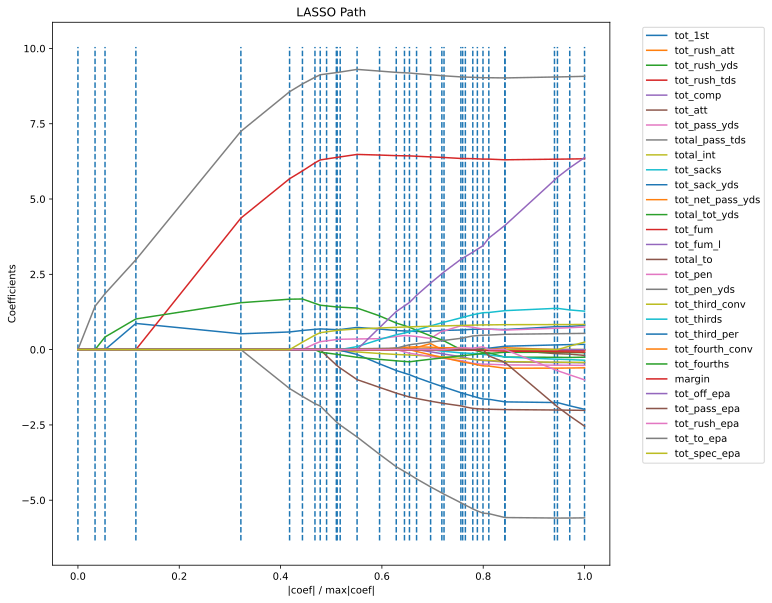

<Figure size 432x288 with 0 Axes>

In [112]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(game_df.drop(['total','home','away','tot_fourth_per'], axis=1).columns,
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.tight_layout()
plt.savefig("lasso_path.png")

In [98]:
X

array([[ 36.  , 448.  ,   0.  , ..., 612.  , -18.94, -14.77],
       [ 38.  , 333.  ,   0.  , ..., 637.  ,   3.41,   1.55],
       [ 35.  , 445.  ,   2.  , ..., 623.  ,   5.97,  14.71],
       ...,
       [ 30.  , 490.  ,   1.  , ..., 601.  , -16.61,  -4.26],
       [ 39.  , 448.  ,   1.  , ..., 641.  ,   9.96,   8.73],
       [ 44.  , 602.  ,   5.  , ..., 883.  ,  25.13,  19.61]])

## Scratch Work Graveyard